In [74]:
import arff, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV



In [32]:
dataset = arff.load(open('albrecht.arff'))
data=np.array(dataset['data'])

In [33]:
data.shape

(24, 8)

In [34]:
X=data[:,0:6]
Y=data[:,7:8]

In [35]:
Y=Y.reshape(24)


In [36]:
X.shape

(24, 6)

In [37]:
from sklearn.model_selection import train_test_split

# Albrech n_estimator=500 and max_features= 1 to 6

In [38]:

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)

In [39]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

albrecht n_estimators=500 and max_features=1 to 7

In [40]:
n_feature=7
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(1,7):   
    clf= RandomForestRegressor(n_estimators=500,max_features=i)
    clf.fit(X_train, training_scores_encoded)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [41]:
MMRE_list

[0.5696435684746409,
 0.5432476125553963,
 0.5241905397108446,
 0.5217940030574177,
 0.549832055223801,
 0.5367452600329448]

In [42]:
MdMRE_list

[0.6106613312680178,
 0.5663306226066005,
 0.5322111785207178,
 0.515310442752033,
 0.5239572307559917,
 0.525209328342154]

In [43]:
Pred_list

[25.0, 25.0, 25.0, 25.0, 12.5, 12.5]

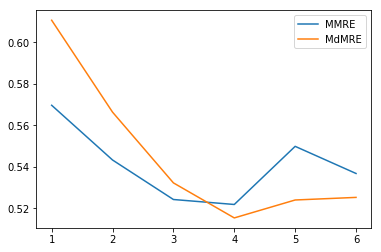

In [46]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,7)

plt.plot(x, MMRE_list)
plt.plot(x, MdMRE_list)

plt.legend(['MMRE','MdMRE'], loc='upper right')

plt.show()

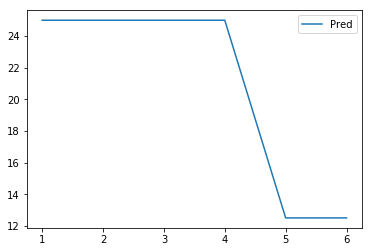

In [47]:
plt.plot(x, Pred_list)
plt.legend(['Pred'], loc='upper right')
plt.show()

# Albrech n_estimator=100 to 1000 and max_features= 5


In [51]:
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(100,1100,100):   
    clf= RandomForestRegressor(n_estimators=i,max_features=5)
    clf.fit(X_train, training_scores_encoded)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [52]:
MMRE_list

[0.5481462011587654,
 0.5389346724512822,
 0.539032768359244,
 0.5350911707076615,
 0.5445490460780971,
 0.5309464700812565,
 0.5366391507112551,
 0.537256885407731,
 0.5334994395863559,
 0.5340082539632021]

In [53]:
MdMRE_list

[0.5226560819241857,
 0.531419689342111,
 0.5155974355664559,
 0.5183818467363711,
 0.5249455703282991,
 0.5179062145920285,
 0.5189683256806014,
 0.522874714943419,
 0.519703445539253,
 0.5204791101931932]

In [54]:
Pred_list

[12.5, 25.0, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 25.0, 12.5]

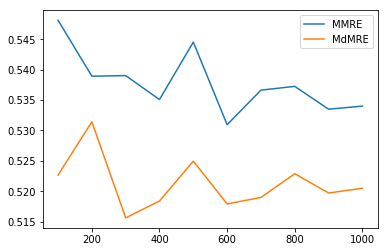

In [55]:
x = np.arange(100,1100,100)
plt.plot(x, MMRE_list)
plt.plot(x, MdMRE_list)

plt.legend(['MMRE','MdMRE'], loc='upper right')

plt.show()

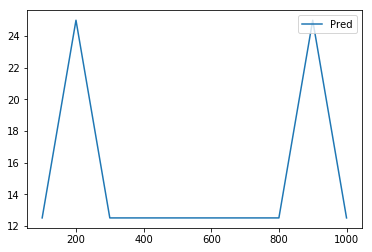

In [56]:
plt.plot(x, Pred_list)
plt.legend(['Pred'], loc='upper right')
plt.show()

# GridSearchCV

In [63]:
params_grd={
 'max_features': [1,2,3,4,5,6],
  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [64]:
clf= RandomForestRegressor()
grd_search=GridSearchCV(estimator = clf, param_grid = params_grd, 
                          cv = 10, n_jobs = -1, verbose = 2)
grd_search.fit(X_train, training_scores_encoded)
best_grid = grd_search.best_estimator_

Y_pred=best_grid.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.8min finished
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [65]:
print(MMRE)
print(MdMRE)
print(Pred)

0.5181951173076893
0.5144290559638214
25.0


In [68]:
grd_search.best_params_

{'max_features': 6, 'n_estimators': 200}


# Random Hyperparameter Grid

In [67]:
Random_grid={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': [1,2,3,4,5,6],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [71]:
clf= RandomForestRegressor()
random_grd_search=RandomizedSearchCV(estimator = clf, param_distributions = Random_grid, n_iter = 100, cv = 10, 
                              verbose=2, random_state=42, n_jobs = -1)
random_grd_search.fit(X_train, training_scores_encoded)
best_grid = random_grd_search.best_estimator_

Y_pred=best_grid.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 179 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 382 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.1min finished
C:\Users\Deepak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
print(MMRE)
print(MdMRE)
print(Pred)

0.49350352629607397
0.46553164520495977
25.0


In [73]:
random_grd_search.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 6,
 'max_depth': 30,
 'bootstrap': False}

#  Regression Tree Analysis

In [80]:
clf= DecisionTreeRegressor(max_depth=30, min_samples_split=20)
clf.fit(X_train, y_train)
Y_pred=clf.predict(X_test)
diff=np.absolute(y_test-Y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100

In [81]:
print(MMRE)
print(MdMRE)
print(Pred)

0.8405324382257534
0.47200839204309997
25.0
